In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np

In [2]:
def read_hdf5_file(file_path):
    with h5py.File(file_path, 'r') as f:
        H = np.array(f['/H'])
        superadiabacicity_parameter = np.array(f['/superadiabacicity_parameter'])
        s0 = np.array(f['/s0'])
        r_over_R = np.array(f['/r_over_R'])
        c_s = np.array(f['/c_s'])
        Gamma_1 = np.array(f['/Gamma_1'])
        T0 = np.array(f['/T0'])
        rho0 = np.array(f['/rho0'])
        p0 = np.array(f['/p0'])

    return H, superadiabacicity_parameter, s0, r_over_R, c_s, Gamma_1, T0, rho0, p0

H, superadiabacicity_parameter, s0, r_over_R, c_s, Gamma_1, T0, rho0, p0 =\
    read_hdf5_file("../../data/solar_s_background.h5")

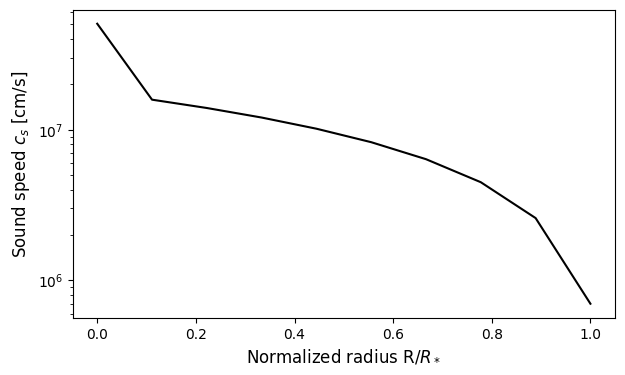

In [3]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, c_s, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel("Sound speed $c_s$ [cm/s]", fontsize=12)
plt.show()

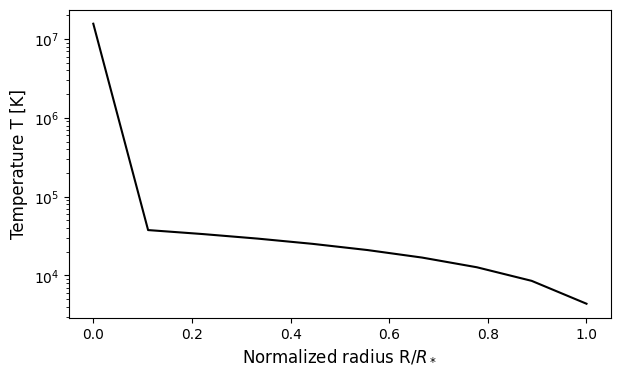

In [4]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, T0, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel("Temperature T [K]", fontsize=12)
plt.show()

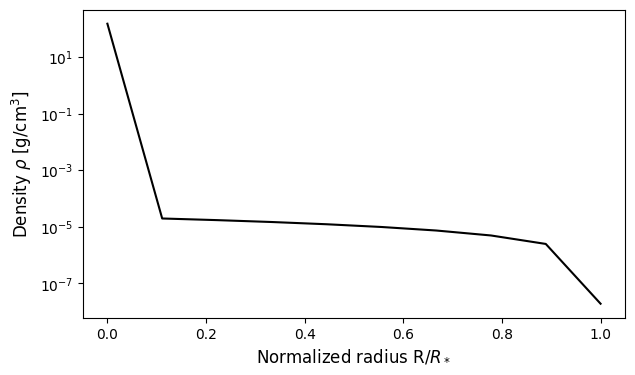

In [5]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, rho0, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Density $\rho$ [g/cm$^3$]", fontsize=12)
plt.show()

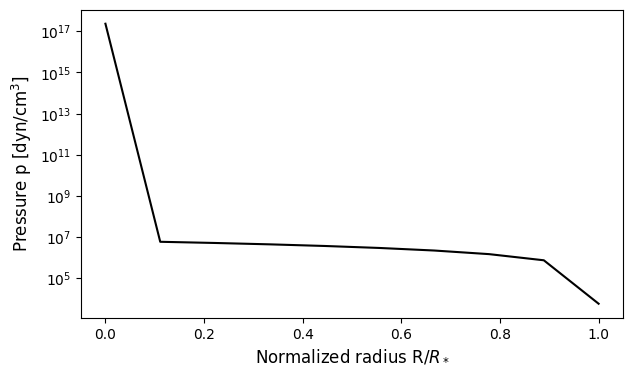

In [6]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, p0, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Pressure p [dyn/cm$^3$]", fontsize=12)
plt.show()

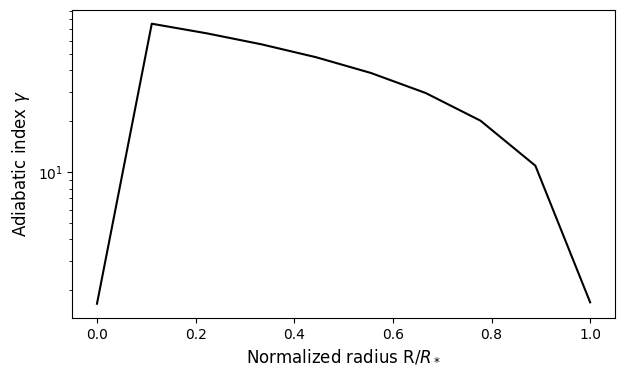

In [7]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, Gamma_1, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Adiabatic index $\gamma$", fontsize=12)
plt.show()

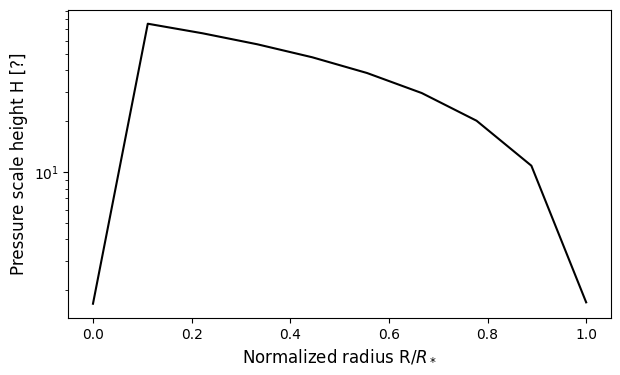

In [8]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, Gamma_1, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Pressure scale height H [?]", fontsize=12)
plt.show()

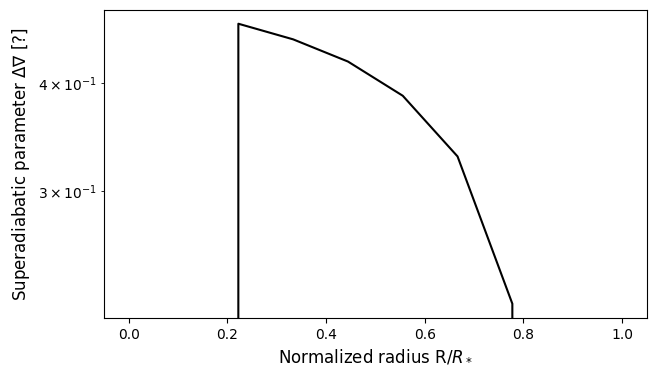

In [9]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, superadiabacicity_parameter, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Superadiabatic parameter $\Delta\nabla$ [?]", fontsize=12)
plt.show()

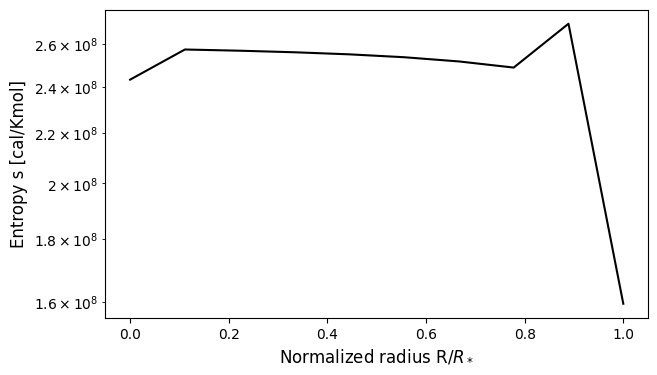

In [10]:
fig, ax = plt.subplots(figsize=(7,4))

ax.semilogy(r_over_R, s0, color="black")
ax.set_xlabel("Normalized radius R/$R_*$", fontsize=12)
ax.set_ylabel(r"Entropy s [cal/Kmol]", fontsize=12)
plt.show()